In [3]:
import os
from pathlib import Path

# ---------------------------------------------------------
# 1. CONFIG: Update this path to your folder
# ---------------------------------------------------------
folder_path = "/Users/yusufmoola/Desktop/videos_renamed_360p"

# ---------------------------------------------------------
# 2. COUNTER SCRIPT
# ---------------------------------------------------------
def count_mp4_files(directory):
    path = Path(directory)
    
    if not path.exists():
        print(f"❌ Error: Path not found: {path}")
        return

    mp4_count = 0
    
    print(f"📂 Scanning: {path}...")
    
    # Walk through all subdirectories
    for root, _, files in os.walk(path):
        for file in files:
            # Check extension (case-insensitive) AND ignore hidden macOS files (._)
            if file.lower().endswith(".mp4") and not file.startswith("._"):
                mp4_count += 1

    print("-" * 30)
    print(f"✅ Total Real MP4 Files: {mp4_count}")
    print("-" * 30)

# Run the function
count_mp4_files(folder_path)

📂 Scanning: /Users/yusufmoola/Desktop/videos_renamed_360p...
------------------------------
✅ Total Real MP4 Files: 1635
------------------------------


In [14]:
from pathlib import Path
import re
import pandas as pd

root = Path("/Users/yusufmoola/Desktop/videos_renamed_360p")

# Example: idapt801_sub344_DP_12_GP1_12-54-18.MP4
pattern = re.compile(
    r"^(?P<shoe_id>idapt\d+)_"
    r"(?P<participant>sub\d+)_"
    r"(?P<dir_result>[A-Z]{2})_"
    r"(?P<angle>\d+(?:\.\d+)?)_"
    r"(?:(?P<group>GP\d+)_)?"
    r"(?P<time>\d{2}-\d{2}-\d{2})\.MP4$",
    re.IGNORECASE,
)

dir_result_map = {
    "UP": ("Up", "Pass"),
    "UF": ("Up", "Fail"),
    "DP": ("Down", "Pass"),
    "DF": ("Down", "Fail"),
    "UU": ("Up", "Undecided"),
    "DU": ("Down", "Undecided")
}

rows = []
for fp in root.rglob("*"):
    if fp.suffix.lower() != ".mp4":
        continue
    m = pattern.match(fp.name)
    if not m:
        rows.append({
            "file": str(fp),
            "shoe_id": None,
            "participant": None,
            "direction": None,
            "result": None,
            "angle": None,
            "group": None,
            "time": None,
            "parsed_ok": False,
        })
        continue

    d = m.groupdict()
    code = d["dir_result"].upper()
    direction, result = dir_result_map.get(code, (None, None))
    angle_val = float(d["angle"])
    angle_val = int(round(angle_val))

    rows.append({
        "file": str(fp),
        "shoe_id": d["shoe_id"].lower(),
        "participant": d["participant"].lower(),
        "direction": direction,
        "result": result,
        "angle": angle_val,
        "group": d["group"],  # e.g., GP1
        "time": d["time"],
        "parsed_ok": True,
    })

df = pd.DataFrame(rows)

df = df.drop(columns=["group"], errors="ignore")

print("Total MP4 files:", len(df))
print("Parsed OK:", df["parsed_ok"].sum())
print("Failed parse:", (~df["parsed_ok"]).sum())

# Basic overview
print("Total files:", len(df))
print("Parsed OK:", df["parsed_ok"].sum())
print("Failed parse:", (~df["parsed_ok"]).sum())

# Missingness
print("\nMissing values:")
display(df.isna().sum())

# Uniques
print("\nUnique participants:", df["participant"].nunique(dropna=True))
print("Unique shoes:", df["shoe_id"].nunique(dropna=True))
print("Unique angles:", df["angle"].nunique(dropna=True))

# Distributions
print("\nParticipant counts:")
display(df["participant"].value_counts(dropna=True))

print("\nShoe counts:")
display(df["shoe_id"].value_counts(dropna=True))

print("\nDirection counts:")
display(df["direction"].value_counts(dropna=True))

print("\nResult counts:")
display(df["result"].value_counts(dropna=True))

print("\nAngle counts:")
display(df["angle"].value_counts(dropna=True).sort_index())


# Cross-tabs
print("\nParticipant x Shoe:")
display(pd.crosstab(df["participant"], df["shoe_id"]))

print("\nParticipant x Angle:")
display(pd.crosstab(df["participant"], df["angle"]))

print("\nParticipant x Result:")
display(pd.crosstab(df["participant"], df["result"]))


print("\nDirection x Result:")
display(pd.crosstab(df["direction"], df["result"]))

print("\nAngle x Result:")
display(pd.crosstab(df["angle"], df["result"]))

Total MP4 files: 1635
Parsed OK: 1635
Failed parse: 0
Total files: 1635
Parsed OK: 1635
Failed parse: 0

Missing values:


file           0
shoe_id        0
participant    0
direction      0
result         0
angle          0
time           0
parsed_ok      0
dtype: int64


Unique participants: 15
Unique shoes: 13
Unique angles: 13

Participant counts:


participant
sub344    202
sub295    194
sub349    185
sub353    169
sub346    117
sub352    103
sub367    102
sub364    101
sub356    100
sub354     91
sub357     63
sub360     59
sub373     58
sub368     48
sub343     43
Name: count, dtype: int64


Shoe counts:


shoe_id
idapt803     226
idapt796     202
idapt802     197
idapt797     194
idapt799     183
idapt801     167
idapt798     147
idapt800     144
idapt805      51
idapt804      44
idapt817      31
idapt816      27
idapt7800     22
Name: count, dtype: int64


Direction counts:


direction
Up      834
Down    801
Name: count, dtype: int64


Result counts:


result
Pass         1230
Fail          400
Undecided       5
Name: count, dtype: int64


Angle counts:


angle
0     122
3     128
5     129
6       2
7     140
8      35
9     171
10     83
11    226
12    174
13    218
14    105
15    102
Name: count, dtype: int64


Participant x Shoe:


shoe_id,idapt7800,idapt796,idapt797,idapt798,idapt799,idapt800,idapt801,idapt802,idapt803,idapt804,idapt805,idapt816,idapt817
participant,,,,,,,,,,,,,
sub295,0,79,63,0,52,0,0,0,0,0,0,0,0
sub343,0,0,0,0,0,0,43,0,0,0,0,0,0
sub344,0,50,57,0,53,0,42,0,0,0,0,0,0
sub346,0,0,0,0,0,0,0,49,68,0,0,0,0
sub349,0,43,51,0,53,0,38,0,0,0,0,0,0
sub352,0,0,0,0,0,0,0,55,48,0,0,0,0
sub353,0,30,23,0,25,0,44,0,0,20,27,0,0
sub354,22,0,0,43,0,26,0,0,0,0,0,0,0
sub356,0,0,0,48,0,52,0,0,0,0,0,0,0



Participant x Angle:


angle,0,3,5,6,7,8,9,10,11,12,13,14,15
participant,,,,,,,,,,,,,
sub295,14,14,14,0,18,11,24,16,29,17,20,10,7
sub343,4,4,4,0,4,0,4,0,4,4,6,3,6
sub344,16,16,17,0,16,2,20,4,25,28,31,14,13
sub346,6,8,8,0,8,0,10,8,16,15,20,9,9
sub349,13,16,16,0,16,0,16,2,20,10,30,19,27
sub352,8,8,8,0,10,4,14,11,12,7,11,3,7
sub353,14,14,14,0,14,0,14,0,22,28,30,11,8
sub354,8,8,8,0,8,0,8,2,12,11,10,10,6
sub356,8,8,8,0,8,0,8,4,16,10,13,11,6



Participant x Result:


result,Fail,Pass,Undecided
participant,,,
sub295,48,142,4
sub343,5,38,0
sub344,42,160,0
sub346,34,83,0
sub349,27,158,0
sub352,27,76,0
sub353,41,128,0
sub354,23,68,0
sub356,30,70,0



Direction x Result:


result,Fail,Pass,Undecided
direction,,,
Down,230,567,4
Up,170,663,1



Angle x Result:


result,Fail,Pass,Undecided
angle,,,
0,0,122,0
3,0,128,0
5,2,127,0
6,0,2,0
7,1,139,0
8,7,27,1
9,16,155,0
10,30,52,1
11,47,177,2


In [5]:
from pathlib import Path
import re

# 1. CONFIG
root = Path("/Users/yusufmoola/Desktop/videos_renamed_360p")

# 2. Regex Pattern
pattern = re.compile(
    r"^(?P<shoe_id>idapt\d+)_"
    r"(?P<participant>sub\d+)_"
    r"(?P<dir_result>[A-Z]{2})_"
    r"(?P<angle>\d+(?:\.\d+)?)_"
    r"(?:(?P<group>GP\d+)_)?"
    r"(?P<time>\d{2}-\d{2}-\d{2})\.MP4$",
    re.IGNORECASE,
)

undecided_files = []

print(f"📂 Scanning: {root}")

# 3. Scan
for fp in root.rglob("*"):
    # Filter for video files & ignore hidden
    if fp.suffix.lower() not in [".mp4", ".mov", ".avi"]:
        continue
    if fp.name.startswith("._"):
        continue

    m = pattern.match(fp.name)
    if m:
        code = m.group("dir_result").upper()
        
        # Check for Undecided (UU or DU)
        if code in ["UU", "DU"]:
            # Combine the last 3 parts: Grandparent / Parent / Filename
            # e.g., "2024-11-14/sub101/video.mp4"
            full_rel_path = f"{fp.parts[-3]}/{fp.parts[-2]}/{fp.name}"
            undecided_files.append(full_rel_path)

# 4. Results
print("-" * 30)
print(f"Found {len(undecided_files)} Undecided files:")
print("-" * 30)

for path in undecided_files:
    print(path)

📂 Scanning: /Users/yusufmoola/Desktop/videos_renamed_360p
------------------------------
Found 5 Undecided files:
------------------------------
2025-02-21/sub295/idapt796_sub295_DU_10_GP0_15-19-18.mp4
2025-02-21/sub295/idapt797_sub295_DU_8_GP0_15-02-01.mp4
2025-02-21/sub295/idapt797_sub295_UU_11_GP0_14-57-39.mp4
2025-02-21/sub295/idapt796_sub295_DU_11_GP0_15-13-39.mp4
2025-05-12/sub367/idapt802_sub367_DU_15_GP1_12-44-55.mp4


## Stat Tests

In [6]:
import numpy as np
from scipy.stats import chi2_contingency, fisher_exact, kruskal

df_bin = df[
    (df["parsed_ok"]) &
    (df["result"].isin(["Pass", "Fail"]))
].copy()

print("Binary samples:", len(df_bin))
print(df_bin["result"].value_counts())


Binary samples: 1630
result
Pass    1230
Fail     400
Name: count, dtype: int64


# Is Slip dependent on angle?

In [8]:
angle_result_ct = pd.crosstab(df_bin["angle"], df_bin["result"])

chi2, p_value, dof, expected = chi2_contingency(angle_result_ct)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("p-value:", p_value)


def cramers_v(chi2, n, r, k):
    return np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

n = angle_result_ct.to_numpy().sum()
r, k = angle_result_ct.shape
cramers_v_angle = cramers_v(chi2, n, r, k)

print("Cramér’s V (Angle vs Result):", cramers_v_angle)



Chi-square statistic: 406.2462520362754
Degrees of freedom: 12
p-value: 1.799418918393005e-79
Cramér’s V (Angle vs Result): 0.49923023693493124


# Is slip dependent on participant identity? (data leakage risk)

In [9]:
participant_result_ct = pd.crosstab(df_bin["participant"], df_bin["result"])

chi2_p, p_p, _, _ = chi2_contingency(participant_result_ct)

n = participant_result_ct.to_numpy().sum()
r, k = participant_result_ct.shape
cramers_v_participant = cramers_v(chi2_p, n, r, k)

print("Participant vs Result p-value:", p_p)
print("Cramér’s V (Participant):", cramers_v_participant)


Participant vs Result p-value: 0.010665037201010748
Cramér’s V (Participant): 0.13323414286406057


# Is slip dependent on shoe ID? (Secondary leakage)

In [10]:
shoe_result_ct = pd.crosstab(df_bin["shoe_id"], df_bin["result"])

chi2_s, p_s, _, _ = chi2_contingency(shoe_result_ct)

n = shoe_result_ct.to_numpy().sum()
r, k = shoe_result_ct.shape
cramers_v_shoe = cramers_v(chi2_s, n, r, k)

print("Shoe vs Result p-value:", p_s)
print("Cramér’s V (Shoe):", cramers_v_shoe)


Shoe vs Result p-value: 0.0009867789648427634
Cramér’s V (Shoe): 0.14217107260263873


# Is slip dependent on direction (Up vs Down)?

In [11]:
dir_result_ct = pd.crosstab(df_bin["direction"], df_bin["result"])

odds_ratio, p_dir = fisher_exact(dir_result_ct)

print("Direction vs Result p-value:", p_dir)
print("Odds ratio:", odds_ratio)


Direction vs Result p-value: 8.795787969133482e-05
Odds ratio: 1.582010582010582


# Are angle distributions different across participants?


In [12]:
angle_by_participant = [
    g["angle"].values
    for _, g in df_bin.groupby("participant")
    if len(g) >= 10
]

H, p_kw = kruskal(*angle_by_participant)

print("Kruskal-Wallis H statistic:", H)
print("p-value:", p_kw)


Kruskal-Wallis H statistic: 47.87533192242696
p-value: 1.3785072554048043e-05


In [13]:
pass_count = (df_bin["result"] == "Pass").sum()
fail_count = (df_bin["result"] == "Fail").sum()

print("Pass ratio:", pass_count / len(df_bin))
print("Fail ratio:", fail_count / len(df_bin))


Pass ratio: 0.754601226993865
Fail ratio: 0.24539877300613497


In [15]:
print("\nParticipant x Result:")
display(pd.crosstab(df_bin["participant"], df_bin["result"]))


Participant x Result:


result,Fail,Pass
participant,,
sub295,48,142
sub343,5,38
sub344,42,160
sub346,34,83
sub349,27,158
sub352,27,76
sub353,41,128
sub354,23,68
sub356,30,70


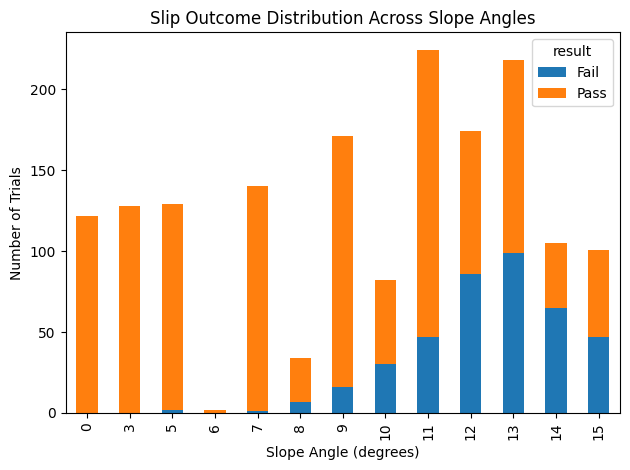

In [16]:
import matplotlib.pyplot as plt

angle_ct = pd.crosstab(df_bin["angle"], df_bin["result"])
angle_ct.plot(kind="bar", stacked=True)
plt.xlabel("Slope Angle (degrees)")
plt.ylabel("Number of Trials")
plt.title("Slip Outcome Distribution Across Slope Angles")
plt.tight_layout()
plt.show()


<Figure size 1200x400 with 0 Axes>

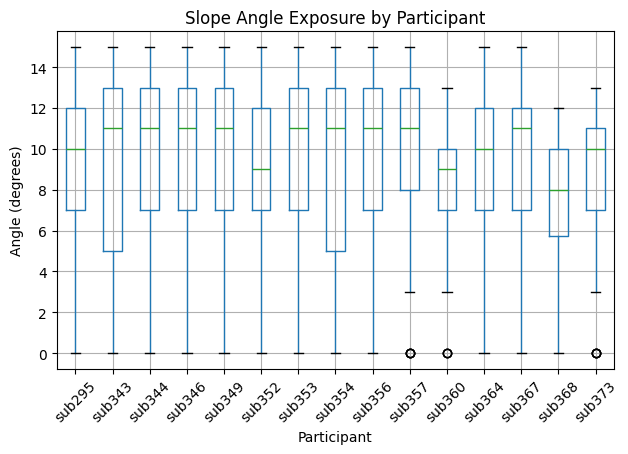

In [17]:
plt.figure(figsize=(12, 4))
df_bin.boxplot(column="angle", by="participant", rot=45)
plt.title("Slope Angle Exposure by Participant")
plt.suptitle("")
plt.xlabel("Participant")
plt.ylabel("Angle (degrees)")
plt.tight_layout()
plt.show()


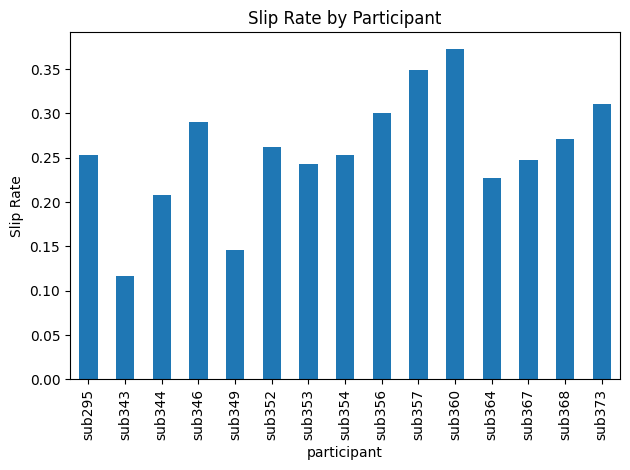

In [18]:
slip_rate = (
    df_bin.assign(is_fail=df_bin["result"] == "Fail")
    .groupby("participant")["is_fail"]
    .mean()
)

slip_rate.plot(kind="bar")
plt.ylabel("Slip Rate")
plt.title("Slip Rate by Participant")
plt.tight_layout()
plt.show()


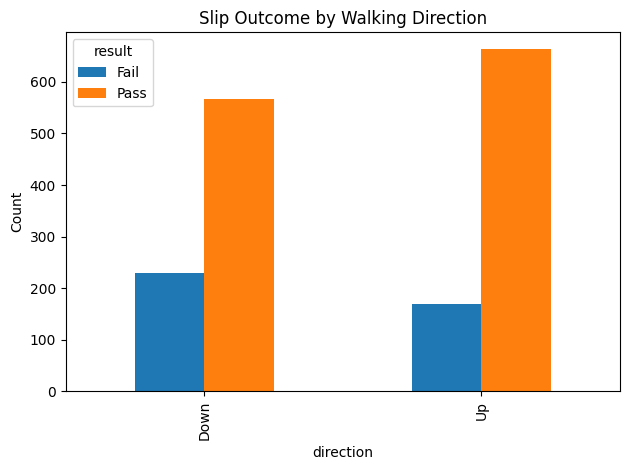

In [19]:
dir_ct = pd.crosstab(df_bin["direction"], df_bin["result"])
dir_ct.plot(kind="bar")
plt.title("Slip Outcome by Walking Direction")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


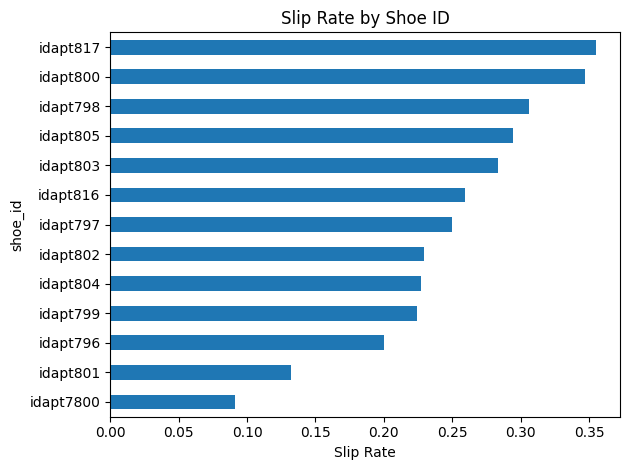

In [20]:
shoe_slip = (
    df_bin.assign(is_fail=df_bin["result"] == "Fail")
    .groupby("shoe_id")["is_fail"]
    .mean()
    .sort_values()
)

shoe_slip.plot(kind="barh")
plt.xlabel("Slip Rate")
plt.title("Slip Rate by Shoe ID")
plt.tight_layout()
plt.show()


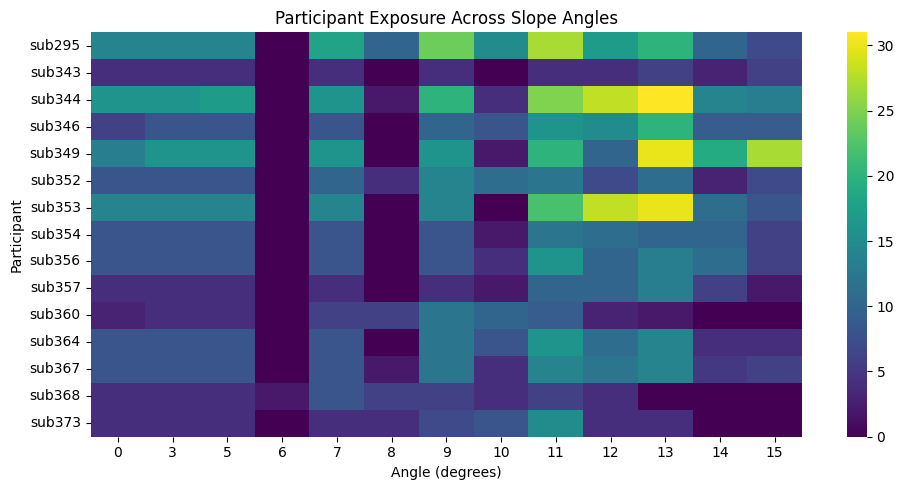

In [21]:
import seaborn as sns

heat = pd.crosstab(df_bin["participant"], df_bin["angle"])
plt.figure(figsize=(10, 5))
sns.heatmap(heat, cmap="viridis")
plt.title("Participant Exposure Across Slope Angles")
plt.xlabel("Angle (degrees)")
plt.ylabel("Participant")
plt.tight_layout()
plt.show()


✅ No participant leakage

Split sizes:
Train: 767
Val:   307
Test:  556

Fail rates:
Train: 0.256
Val: 0.287
Test: 0.209


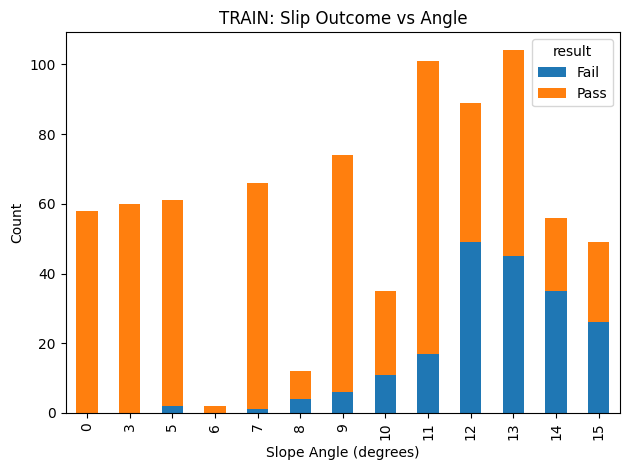

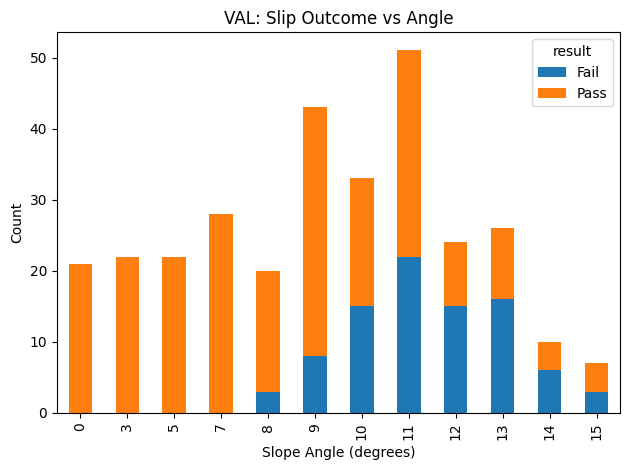

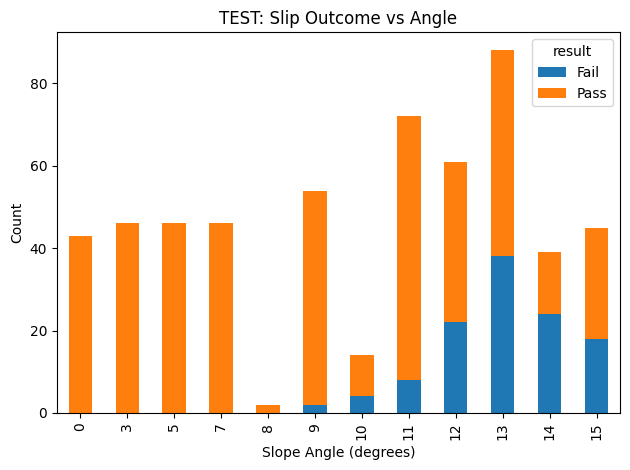

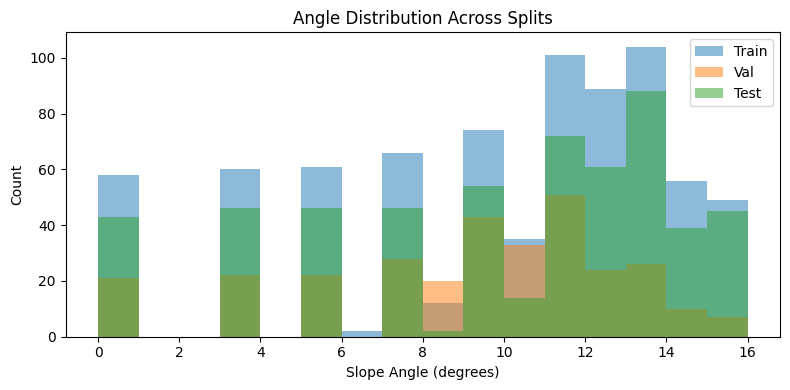

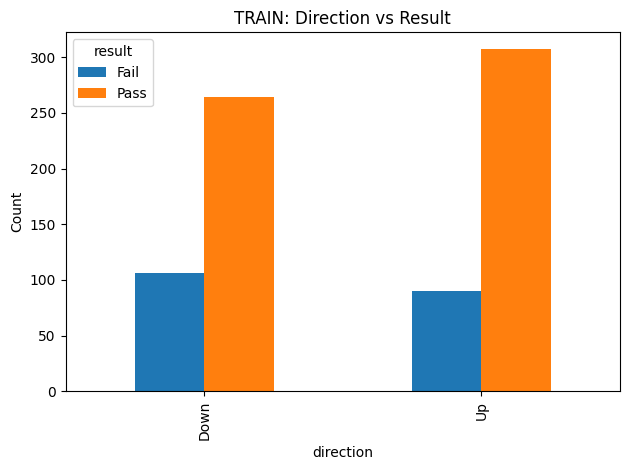

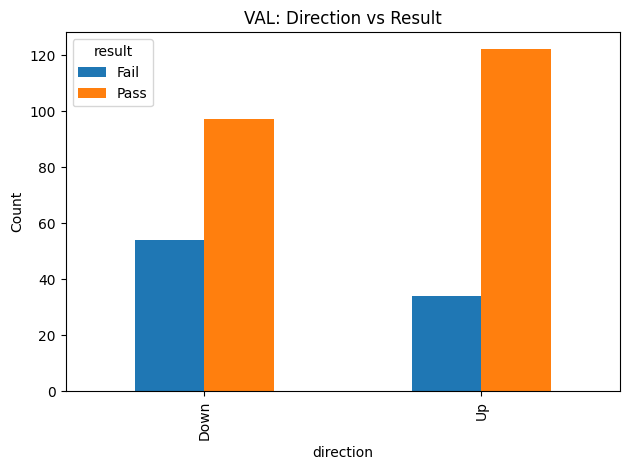

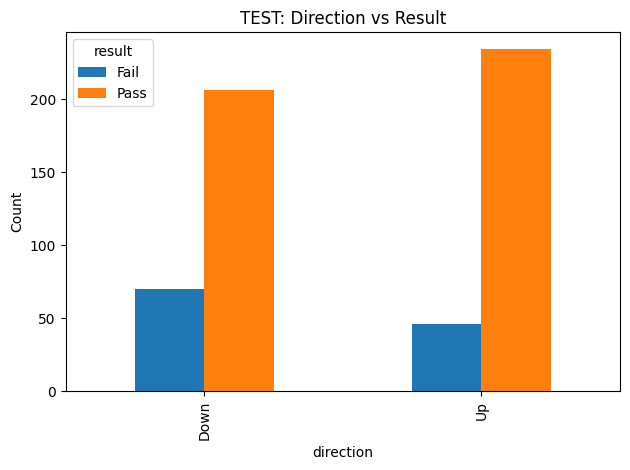

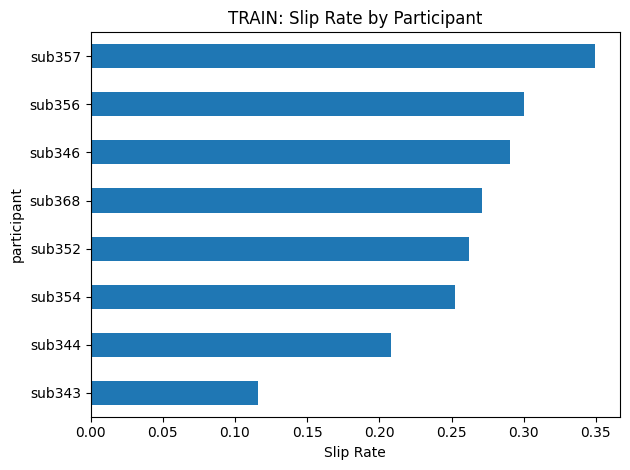

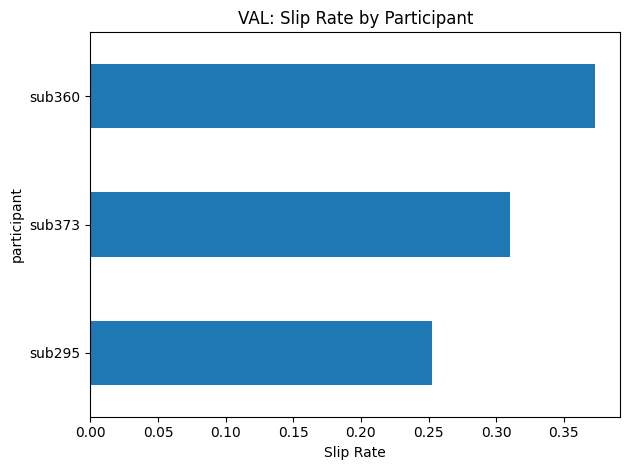

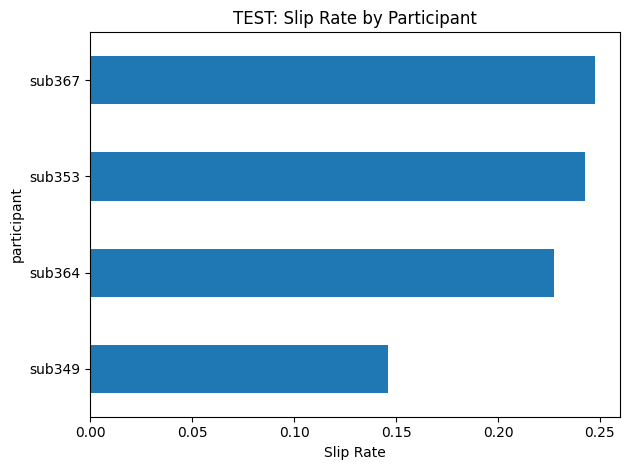

,Split,Samples,Fail Rate,Mean Angle,High Angle % (>=12)
0,Train,767,0.256,9.284,0.389
1,Val,307,0.287,8.733,0.218
2,Test,556,0.209,9.390,0.419


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. DEFINE THE PROPOSED SPLITS
# -------------------------------
TRAIN_PARTICIPANTS = {
    "sub344", "sub346", "sub352", "sub356",
    "sub354", "sub357", "sub368", "sub343"
}

VAL_PARTICIPANTS = {
    "sub295", "sub360", "sub373"
}

TEST_PARTICIPANTS = {
    "sub349", "sub353", "sub367", "sub364"
}

# -------------------------------
# 2. APPLY THE SPLITS
# -------------------------------
train_df = df_bin[df_bin["participant"].isin(TRAIN_PARTICIPANTS)].copy()
val_df   = df_bin[df_bin["participant"].isin(VAL_PARTICIPANTS)].copy()
test_df  = df_bin[df_bin["participant"].isin(TEST_PARTICIPANTS)].copy()

# -------------------------------
# 3. SANITY CHECKS (CRITICAL)
# -------------------------------
assert set(train_df["participant"]).isdisjoint(val_df["participant"])
assert set(train_df["participant"]).isdisjoint(test_df["participant"])
assert set(val_df["participant"]).isdisjoint(test_df["participant"])

print("✅ No participant leakage")

print("\nSplit sizes:")
print(f"Train: {len(train_df)}")
print(f"Val:   {len(val_df)}")
print(f"Test:  {len(test_df)}")

print("\nFail rates:")
for name, d in [("Train", train_df), ("Val", val_df), ("Test", test_df)]:
    fail_rate = (d["result"] == "Fail").mean()
    print(f"{name}: {fail_rate:.3f}")

# -------------------------------
# 4. ANGLE × RESULT PER SPLIT
# -------------------------------
def plot_angle_result(df, title):
    ct = pd.crosstab(df["angle"], df["result"])
    ct.plot(kind="bar", stacked=True)
    plt.title(title)
    plt.xlabel("Slope Angle (degrees)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_angle_result(train_df, "TRAIN: Slip Outcome vs Angle")
plot_angle_result(val_df,   "VAL: Slip Outcome vs Angle")
plot_angle_result(test_df,  "TEST: Slip Outcome vs Angle")

# -------------------------------
# 5. ANGLE DISTRIBUTIONS PER SPLIT
# -------------------------------
plt.figure(figsize=(8, 4))
plt.hist(train_df["angle"], bins=range(0, 17), alpha=0.5, label="Train")
plt.hist(val_df["angle"],   bins=range(0, 17), alpha=0.5, label="Val")
plt.hist(test_df["angle"],  bins=range(0, 17), alpha=0.5, label="Test")
plt.xlabel("Slope Angle (degrees)")
plt.ylabel("Count")
plt.title("Angle Distribution Across Splits")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 6. DIRECTION × RESULT PER SPLIT
# -------------------------------
def plot_direction_result(df, title):
    ct = pd.crosstab(df["direction"], df["result"])
    ct.plot(kind="bar")
    plt.title(title)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

plot_direction_result(train_df, "TRAIN: Direction vs Result")
plot_direction_result(val_df,   "VAL: Direction vs Result")
plot_direction_result(test_df,  "TEST: Direction vs Result")

# -------------------------------
# 7. SLIP RATE BY PARTICIPANT (PER SPLIT)
# -------------------------------
def plot_slip_rate_by_participant(df, title):
    slip_rate = (
        df.assign(is_fail=df["result"] == "Fail")
          .groupby("participant")["is_fail"]
          .mean()
          .sort_values()
    )
    slip_rate.plot(kind="barh")
    plt.xlabel("Slip Rate")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_slip_rate_by_participant(train_df, "TRAIN: Slip Rate by Participant")
plot_slip_rate_by_participant(val_df,   "VAL: Slip Rate by Participant")
plot_slip_rate_by_participant(test_df,  "TEST: Slip Rate by Participant")

# -------------------------------
# 8. SUMMARY TABLE (FOR SLIDES)
# -------------------------------
summary = pd.DataFrame({
    "Split": ["Train", "Val", "Test"],
    "Samples": [len(train_df), len(val_df), len(test_df)],
    "Fail Rate": [
        (train_df["result"] == "Fail").mean(),
        (val_df["result"] == "Fail").mean(),
        (test_df["result"] == "Fail").mean(),
    ],
    "Mean Angle": [
        train_df["angle"].mean(),
        val_df["angle"].mean(),
        test_df["angle"].mean(),
    ],
    "High Angle % (>=12)": [
        (train_df["angle"] >= 12).mean(),
        (val_df["angle"] >= 12).mean(),
        (test_df["angle"] >= 12).mean(),
    ]
})

display(summary.round(3))
